In [1]:
import scvelo as scv
import scanpy as sc
import pandas as pd
from matplotlib import rcParams

In [2]:
#ppdata = sc.read_h5ad("preprocessed_adata.h5ad")
#cdata = sc.read_h5ad("cytopath_adata.h5ad")
rdata = sc.read_h5ad("raw_dario_chronic.h5ad")
vdata = sc.read_h5ad("velocity_adata.h5ad")

In [3]:
rdata

AnnData object with n_obs × n_vars = 13694 × 27998
    obs: '_X', '_Y', 'sampleID', 'custom_louvain', 'louvain'
    var: 'Accession-0', 'Chromosome-0', 'End-0', 'Start-0', 'Strand-0', 'Accession-1', 'Chromosome-1', 'End-1', 'Start-1', 'Strand-1', 'Accession-2', 'Chromosome-2', 'End-2', 'Start-2', 'Strand-2', 'Accession-3', 'Chromosome-3', 'End-3', 'Start-3', 'Strand-3', 'Accession-4', 'Chromosome-4', 'End-4', 'Start-4', 'Strand-4', 'Accession-5', 'Chromosome-5', 'End-5', 'Start-5', 'Strand-5'
    uns: 'Clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [4]:
rdata.obs

,_X,_Y,sampleID,custom_louvain,louvain
index,,,,,
AACTCTTCACGAGAGT-1-0,25.610258,-3.319378,0,root,3
AAGACCTAGCGTGTCC-1-0,6.223633,18.599552,0,root,10
AAACCTGAGCAGACTG-1-0,9.918443,-12.768498,0,root,3
AACTGGTTCGTCCAGG-1-0,20.121569,-14.512661,0,9,11
AACGTTGGTCAGAATA-1-0,23.029953,-14.279251,0,root,3
...,...,...,...,...,...
TTTGCGCGTGGCAAAC-1-3,1.827017,28.399481,3,memory,2
TTTACTGTCCTTTCGG-1-3,26.692526,3.370537,3,exhausted,7
TTGTAGGGTTCTGTTT-1-3,27.292191,-9.181242,3,6,6


In [9]:
rdata.var

,Accession-0,Chromosome-0,End-0,Start-0,Strand-0,Accession-1,Chromosome-1,End-1,Start-1,Strand-1,...,Accession-4,Chromosome-4,End-4,Start-4,Strand-4,Accession-5,Chromosome-5,End-5,Start-5,Strand-5
index,,,,,,,,,,,,,,,,,,,,,
Xkr4,ENSMUSG00000051951,1,3671498,3205901,-,ENSMUSG00000051951,1,3671498,3205901,-,...,ENSMUSG00000051951,1,3671498,3205901,-,ENSMUSG00000051951,1,3671498,3205901,-
Gm37381,ENSMUSG00000102343,1,3986215,3905739,-,ENSMUSG00000102343,1,3986215,3905739,-,...,ENSMUSG00000102343,1,3986215,3905739,-,ENSMUSG00000102343,1,3986215,3905739,-
Rp1,ENSMUSG00000025900,1,4409241,3999557,-,ENSMUSG00000025900,1,4409241,3999557,-,...,ENSMUSG00000025900,1,4409241,3999557,-,ENSMUSG00000025900,1,4409241,3999557,-
Rp1-1,ENSMUSG00000109048,1,4409187,4292981,-,ENSMUSG00000109048,1,4409187,4292981,-,...,ENSMUSG00000109048,1,4409187,4292981,-,ENSMUSG00000109048,1,4409187,4292981,-
Sox17,ENSMUSG00000025902,1,4497354,4490931,-,ENSMUSG00000025902,1,4497354,4490931,-,...,ENSMUSG00000025902,1,4497354,4490931,-,ENSMUSG00000025902,1,4497354,4490931,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gm28672,ENSMUSG00000100492,Y,89225296,89222067,+,ENSMUSG00000100492,Y,89225296,89222067,+,...,ENSMUSG00000100492,Y,89225296,89222067,+,ENSMUSG00000100492,Y,89225296,89222067,+
Gm28670,ENSMUSG00000099982,Y,89394761,89391528,+,ENSMUSG00000099982,Y,89394761,89391528,+,...,ENSMUSG00000099982,Y,89394761,89391528,+,ENSMUSG00000099982,Y,89394761,89391528,+
Gm29504,ENSMUSG00000100533,Y,90277501,90275224,+,ENSMUSG00000100533,Y,90277501,90275224,+,...,ENSMUSG00000100533,Y,90277501,90275224,+,ENSMUSG00000100533,Y,90277501,90275224,+


In [10]:
rdata.X

<13694x27998 sparse matrix of type '<class 'numpy.float32'>'
	with 21456731 stored elements in Compressed Sparse Row format>

In [16]:
rdata.uns

OverloadedDict, wrapping:
	{'Clusters_colors': array(['#1f77b4', '#ff7f0e', '#2ca02c'], dtype=object), 'sampleID_colors': ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], 'custom_louvain_colors': ['#023fa5', '#7d87b9', '#bec1d4', '#d6bcc0', '#bb7784', '#8e063b', '#4a6fe3', '#8595e1', '#b5bbe3', '#e6afb9', '#e07b91']}
With overloaded keys:
	['neighbors'].

In [17]:
rdata.obsm

AxisArrays with keys: X_umap

In [21]:
rdata.layers

Layers with keys: ambiguous, matrix, spliced, unspliced

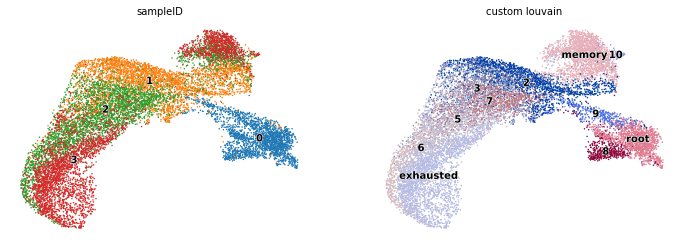

In [8]:
scv.pl.umap(rdata, color=['sampleID', 'custom_louvain'], legend_loc='on data')

In [22]:
scv.pp.filter_and_normalize(rdata, n_top_genes=5000, min_shared_counts=10, log=True)

Filtered out 19989 genes that are detected 10 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 5000 highly variable genes.
Logarithmized X.


In [23]:
scv.pp.moments(rdata, n_pcs=50, n_neighbors=30)

computing neighbors
    finished (0:00:22) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:05) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [25]:
scv.tl.velocity(rdata, mode='stochastic')

computing velocities
    finished (0:00:07) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [28]:
scv.tl.velocity_graph(rdata, mode_neighbors='connectivities')

computing velocity graph
    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [30]:
scv.tl.terminal_states(rdata)

computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


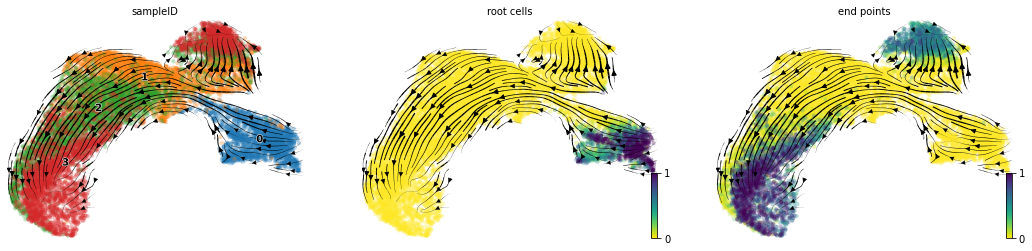

In [31]:
scv.pl.velocity_embedding_stream(rdata, color=['sampleID', 'root_cells', 'end_points'])

In [33]:
rdata.layers['velocity']

array([[ 0.02237226,  0.05776249,  0.9854631 , ..., -0.00758775,
        -0.01416803, -0.1738174 ],
       [-0.01125688,  0.15242372,  0.820786  , ...,  0.04379243,
         0.02078637,  0.4499681 ],
       [ 0.03219714,  0.2124608 ,  0.360419  , ...,  0.00774516,
         0.01232132,  0.31198502],
       ...,
       [ 0.03335403,  0.21108098,  0.36252898, ...,  0.        ,
         0.04310969,  1.2294806 ],
       [-0.01263537,  0.11702901,  0.90994245, ...,  0.08973685,
        -0.03106545, -0.13472287],
       [ 0.02230685,  0.03091158, -0.16404533, ...,  0.05576335,
         0.05032972,  0.14672062]], dtype=float32)

In [39]:
rdata[:, ['Tox', 'Pdcd1', 'Gzmb']].layers['Ms']

ArrayView([[ 0.05231348,  0.75586027, 10.568479  ],
           [ 0.0432855 ,  0.93105286, 12.630944  ],
           [ 0.0672916 ,  0.4091289 , 13.1229515 ],
           ...,
           [ 0.5205576 ,  0.16376005,  4.707669  ],
           [ 0.9367588 ,  0.8608593 ,  0.1228324 ],
           [ 2.616982  ,  1.8630873 ,  4.544636  ]], dtype=float32)